In [1]:
# Import the necessary modules to extract treat and plot our data

import requests
import pandas as pd
import numpy as np
import datetime
import json
import urllib.parse
from bloomberg import api_key
import matplotlib.pyplot as plt


In [2]:
# Follow Bloomberg API Documentation to creat the URL that will extract the exact data.

# Identify our data by the ticks of each Company and insert that information
# For a 5 Year Period in our URL
def extract_ticks(interval="y5"):
    url = "https://bloomberg-market-and-financial-news.p.rapidapi.com/market/get-chart"
    querystring = {"interval":interval,"id":"gmg:au,scg:au,dxs:au,sgp:au,mgr:au,llc:au,gpt:au,vcx:au,chc:au,goz:au"}
        
    headers = {
            'x-rapidapi-host': "bloomberg-market-and-financial-news.p.rapidapi.com",
            'x-rapidapi-key': api_key
            }
    
    response = requests.get(url, headers=headers, params=querystring)                     
    json_d = response.json()
    return json_d

json_d = extract_ticks()

In [3]:
# Dump data in a Json File 
with open("tenstocks.json","w") as fp:
    json.dump(json_d,fp)

In [4]:
# Read Extracted Data and retrieve the important information of each Share
# Close price and Volume traded

with open("tenstocks.json","r") as fp:
    json_d = json.load(fp)
        
gmg = json_d['result']['gmg:au']['ticks']
scg = json_d['result']['scg:au']['ticks']
dxs = json_d['result']['dxs:au']['ticks']
sgp = json_d['result']['sgp:au']['ticks']
mgr = json_d['result']['mgr:au']['ticks']
llc = json_d['result']['llc:au']['ticks']
gpt = json_d['result']['gpt:au']['ticks']
vcx = json_d['result']['vcx:au']['ticks']
chc = json_d['result']['chc:au']['ticks']
goz = json_d['result']['goz:au']['ticks']

# Create newly named columns for the variables of each share
gmg_df = pd.DataFrame(gmg)
gmg_df['GMG'] = gmg_df['close']
gmg_df['GMG Vol'] = gmg_df['volume']

scg_df = pd.DataFrame(scg)
scg_df['SCG'] = scg_df['close']
scg_df['SCG Vol'] = scg_df['volume']

dxs_df = pd.DataFrame(dxs)
dxs_df['DXS'] = dxs_df['close']
dxs_df['DXS Vol'] = dxs_df['volume']

sgp_df = pd.DataFrame(sgp)
sgp_df['SGP'] = sgp_df['close']
sgp_df['SGP Vol'] = sgp_df['volume']

mgr_df = pd.DataFrame(mgr)
mgr_df['MGR'] = mgr_df['close']
mgr_df['MGR Vol'] = mgr_df['volume']

llc_df = pd.DataFrame(llc)
llc_df['LLC'] = llc_df['close']
llc_df['LLC Vol'] = llc_df['volume']

gpt_df = pd.DataFrame(gpt)
gpt_df['GPT'] = gpt_df['close']
gpt_df['GPT Vol'] = gpt_df['volume']

vcx_df = pd.DataFrame(vcx)
vcx_df['VXS'] = vcx_df['close']
vcx_df['VXS Vol'] = vcx_df['volume']

chc_df = pd.DataFrame(chc)
chc_df['CHC'] = chc_df['close']
chc_df['CHC Vol'] = chc_df['volume']

goz_df = pd.DataFrame(goz)
goz_df['GOZ'] = goz_df['close']
goz_df['GOZ Vol'] = goz_df['volume']

# Merge the data frame of all Shares
frames = [gmg_df, scg_df, dxs_df, sgp_df, mgr_df, llc_df, gpt_df, vcx_df, chc_df,goz_df ]
result = pd.concat(frames, axis=1, sort=False)

# Drop old volume and close columns
result = result.drop(['volume','close'],axis=1)
result = result.loc[:, ~result.columns.duplicated()]
# Create a Date columns that expresses the date of each row
result['Date'] = result['time'].apply(lambda x:datetime.datetime.fromtimestamp(x))

# Ensure our data is in the rigght order
result = result.set_index('time')
result = result.sort_index(ascending=True, axis=0)
result

,GMG,GMG Vol,SCG,SCG Vol,DXS,DXS Vol,SGP,SGP Vol,MGR,MGR Vol,...,LLC Vol,GPT,GPT Vol,VXS,VXS Vol,CHC,CHC Vol,GOZ,GOZ Vol,Date
time,,,,,,,,,,,,,,,,,,,,,
1446210000,6.07,13396061,4.14,88167140,7.74,11668373,4.05,75376440,1.805,56558788,...,15776310,4.77,19887215,2.910,52891323,4.49,3998722,3.073,1202184,2015-10-30 21:00:00
1446818400,6.15,29056460,4.09,73123651,7.73,13635353,4.03,53990823,1.805,74759458,...,14411594,4.70,27329132,2.930,47224882,4.53,5372130,3.073,1351930,2015-11-06 22:00:00
1447423200,5.85,29807433,3.91,76729685,7.45,17517388,3.84,41526588,1.790,119757349,...,14841403,4.59,31181604,2.720,80831321,4.42,7090681,2.973,2013785,2015-11-13 22:00:00
1448028000,6.17,21073001,4.10,63156691,7.73,22708071,3.99,46353485,1.880,165828156,...,12316285,4.70,30512485,2.830,72314221,4.53,8728733,3.083,3110651,2015-11-20 22:00:00
1448632800,6.13,13376052,4.06,64868907,7.73,11574240,4.01,37731930,1.885,108708973,...,9998954,4.68,17697245,2.750,53437950,4.52,5256045,3.023,2242500,2015-11-27 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601038800,18.24,32210478,2.20,143321680,9.07,30043172,3.71,74167980,2.210,120143837,...,13753819,3.97,59080353,1.400,102791740,12.37,11900779,3.440,4305698,2020-09-25 21:00:00
1601643600,18.12,22722505,2.21,112787761,9.12,23539573,3.88,62609408,2.240,100414851,...,11851270,4.03,44741116,1.390,116200328,12.88,8855988,3.400,4900227,2020-10-02 21:00:00
1602248400,18.62,24367766,2.30,83448817,9.15,16191094,4.04,48427475,2.260,81384574,...,7781458,4.12,27857055,1.430,72276386,13.43,6858200,3.480,5033885,2020-10-09 21:00:00


In [5]:
# Organise rows by including only the last value of each quarter in our data set
q_result = result.groupby(pd.PeriodIndex(result['Date'],freq="Q")).max()
q_result.index.name = 'Quarter'
# Organise data monthly to later run a Scatter Plot with relationsship to National Sales Data
m_result = result.groupby(pd.PeriodIndex(result['Date'],freq="M")).max()
m_result.index.name ='Month'

# Drop all information before and including 2018 Q2
quarter_select = q_result[q_result.index <= '2018Q2'].index
q_result.drop(quarter_select, inplace = True)
m_result

,GMG,GMG Vol,SCG,SCG Vol,DXS,DXS Vol,SGP,SGP Vol,MGR,MGR Vol,...,LLC Vol,GPT,GPT Vol,VXS,VXS Vol,CHC,CHC Vol,GOZ,GOZ Vol,Date
Month,,,,,,,,,,,,,,,,,,,,,
2015-10,6.07,13396061,4.14,88167140,7.74,11668373,4.05,75376440,1.805,56558788,...,15776310,4.77,19887215,2.91,52891323,4.49,3998722,3.073,1202184,2015-10-30 21:00:00
2015-11,6.17,29807433,4.10,76729685,7.73,22708071,4.03,53990823,1.885,165828156,...,14841403,4.70,31181604,2.93,80831321,4.53,8728733,3.083,3110651,2015-11-27 22:00:00
2015-12,6.37,31519948,4.16,117432396,7.69,24437318,4.22,70783226,2.020,143208022,...,14109568,4.85,42094657,2.83,100063445,4.64,7485643,3.083,4690440,2015-12-25 22:00:00
2016-01,6.27,29032406,4.35,86117491,7.50,28006821,4.10,50749647,1.980,110056150,...,12620742,4.88,33861936,2.91,86138400,4.54,8230505,3.073,1992101,2016-01-29 22:00:00
2016-02,6.53,40733786,4.51,86732856,7.52,20724370,4.27,67550082,1.895,106063309,...,18387620,4.97,41778358,3.12,90900490,4.47,6987972,3.083,2190894,2016-02-26 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06,15.28,34974572,2.51,260790271,10.05,45665474,3.96,128652663,2.490,147156076,...,20662436,4.47,98814385,1.74,342552844,10.10,15688791,3.420,11467395,2020-06-26 21:00:00
2020-07,16.93,29184048,2.25,144948067,9.46,31633681,3.48,76245797,2.290,133108680,...,14259972,4.41,48017006,1.45,149541601,10.52,11583336,3.340,9905968,2020-07-31 21:00:00
2020-08,18.41,38551505,2.14,170899937,8.75,36639084,3.90,82621643,2.120,101318947,...,13894489,3.83,57442370,1.38,173745503,12.49,13039054,3.410,6851511,2020-08-28 21:00:00


In [6]:
# Split our data frame into two dataframes containing Stock price and Volume of Stock value
stock_price = q_result[['GMG', 'SCG','DXS','SGP','MGR','LLC','GPT', 'VXS', 'CHC', 'GOZ']]
m_stocks = m_result[['GMG', 'SCG','DXS','SGP','MGR','LLC','GPT', 'VXS', 'CHC', 'GOZ']]
stock_vol = q_result[['GMG Vol', 'SCG Vol','DXS Vol','SGP Vol','MGR Vol','LLC Vol','GPT Vol', 'VXS Vol', 'CHC Vol', 'GOZ Vol']]
stock_vol

,GMG Vol,SCG Vol,DXS Vol,SGP Vol,MGR Vol,LLC Vol,GPT Vol,VXS Vol,CHC Vol,GOZ Vol
Quarter,,,,,,,,,,
2018Q3,35476929,93890468,26887063,51661654,93333428,11890057,53151055,81445341,10313607,6369215
2018Q4,40068466,108348774,35192124,68352303,131399407,60123486,62897849,101913730,17049612,5768882
2019Q1,70101375,111055466,39944038,77082076,105086598,33709030,50294836,139930562,14697936,7431647
2019Q2,31608564,161321082,48257591,117278041,156737890,21411295,93223879,127060086,17372180,7276832
2019Q3,151540522,142984078,31416417,83329784,103404641,35552236,66468116,82790690,24978072,9739548
2019Q4,38060440,334235889,32783308,63641655,98318676,18666018,56562399,74636064,15754556,10997246
2020Q1,85735875,365094044,73429975,174111365,249064894,26181601,114131068,224668714,35912861,19781138
2020Q2,46042071,260790271,61634523,131894251,174480803,36030881,107856545,342552844,21975378,14418973
2020Q3,39023744,226613765,36639084,82621643,133108680,16512666,59080353,173745503,13039054,9905968


In [7]:
# Based on stock price data frame create a table that holds the % change in share price and volume of trades 
# price_change is a great indicator of company valuation
# vol_change is a great indication of each asset's liquidity
price_change = (stock_price.pct_change(1) * 100)
m_change = (m_stocks.pct_change(1)*100)
vol_change = (stock_vol.pct_change(1) * 100)

# Define the mean of % changes in price change and volume of trades
price_change['Quarterly Avg (%)'] = price_change.mean(axis=1)
vol_change['Avg Vol'] = vol_change.mean(axis=1)
# Always working on our Quartely and Monthly Data
m_change['Monthly Avg (%)'] = m_change.mean(axis=1)


# Edit monthly monthly price change table to drop unwanted rows
month_drop_top = m_change[m_change.index <= '2018-09'].index
month_drop_bot = m_change[m_change.index >= '2020-07'].index
m_change.drop(month_drop_top, inplace = True)
m_change.drop(month_drop_bot, inplace = True)
m_change

,GMG,SCG,DXS,SGP,MGR,LLC,GPT,VXS,CHC,GOZ,Monthly Avg (%)
Month,,,,,,,,,,,
2018-10,-3.544776,-5.301205,-4.465116,-2.606635,-4.878049,-4.933876,-3.558052,-2.564103,-1.952580,-2.794155,-3.659855
2018-11,3.481625,2.544529,1.850049,-9.975669,-4.700855,-7.811664,3.689320,1.503759,0.853485,-3.744726,-1.231015
2018-12,2.523364,3.225806,6.022945,3.783784,3.587444,-28.728961,3.932584,2.222222,6.488011,4.109589,0.716679
2019-01,8.295351,-2.163462,5.229937,-0.260417,3.030303,-0.081433,3.243243,-3.985507,6.490066,0.789474,2.058756
2019-02,8.417508,0.737101,6.341045,1.305483,9.243697,15.647922,6.457243,0.000000,10.323383,8.093995,6.656738
2019-03,3.959627,0.243902,2.659146,-0.773196,5.769231,-5.849190,1.803279,-1.886792,15.783540,0.241546,2.195109
2019-04,1.568335,-3.649635,2.433281,2.337662,5.454545,-0.898204,-2.898551,-0.384615,-0.973710,4.337349,0.732646
2019-05,1.838235,-1.262626,1.149425,12.944162,7.586207,8.157100,0.497512,3.474903,4.326450,0.461894,3.917326
2019-06,8.880866,-1.534527,3.333333,0.898876,2.884615,-6.145251,3.465347,-2.238806,8.576814,-0.689655,1.743161


In [8]:
# Once the change values were calculated we are only interested in 2018Q4, so we drop 2018Q3 row   
drop_q3 = price_change[price_change.index <= '2018Q3'].index
price_change.drop(drop_q3, inplace = True)

drop_q3 = vol_change[vol_change.index <= '2018Q3'].index
vol_change.drop(drop_q3, inplace = True)


In [9]:
# price_change is a great indicator of company valuation
# Format our data frames into % values with 2 decimal places
pd.options.display.float_format = '{:.2f}%'.format
price_change

,GMG,SCG,DXS,SGP,MGR,LLC,GPT,VXS,CHC,GOZ,Quarterly Avg (%)
Quarter,,,,,,,,,,,
2018Q4,2.33%,-6.94%,3.16%,-4.64%,-4.88%,-11.34%,3.93%,-0.72%,5.30%,-2.59%,-1.64%
2019Q1,22.06%,-1.20%,14.88%,-5.60%,17.52%,-24.08%,11.89%,-3.99%,36.03%,9.21%,7.67%
2019Q2,12.62%,-3.65%,7.06%,15.72%,16.73%,0.92%,0.97%,1.13%,12.17%,4.82%,6.85%
2019Q3,6.56%,4.29%,1.91%,4.68%,3.74%,24.79%,3.51%,0.37%,9.81%,2.76%,6.24%
2019Q4,-7.78%,-3.63%,-12.01%,7.45%,1.20%,9.57%,-2.62%,0.00%,-6.40%,-1.57%,-1.58%
2020Q1,10.93%,1.26%,8.18%,5.35%,3.26%,-1.53%,-1.27%,-4.83%,17.15%,0.91%,3.94%
2020Q2,-6.51%,-37.72%,-24.04%,-25.56%,-28.45%,-32.31%,-28.37%,-32.03%,-27.18%,-22.97%,-26.51%
2020Q3,19.78%,-9.56%,-5.87%,-1.52%,-8.03%,-2.68%,-1.34%,-16.67%,23.86%,0.58%,-0.14%
2020Q4,3.80%,1.32%,-2.33%,5.13%,-1.31%,-0.63%,-4.99%,-1.38%,7.35%,1.16%,0.81%


In [10]:
# vol_change is a great indication of each asset's liquidity
#
vol_change

,GMG Vol,SCG Vol,DXS Vol,SGP Vol,MGR Vol,LLC Vol,GPT Vol,VXS Vol,CHC Vol,GOZ Vol,Avg Vol
Quarter,,,,,,,,,,,
2018Q4,12.94%,15.40%,30.89%,32.31%,40.78%,405.66%,18.34%,25.13%,65.31%,-9.43%,63.73%
2019Q1,74.95%,2.50%,13.50%,12.77%,-20.03%,-43.93%,-20.04%,37.30%,-13.79%,28.82%,7.21%
2019Q2,-54.91%,45.26%,20.81%,52.15%,49.15%,-36.48%,85.35%,-9.20%,18.19%,-2.08%,16.82%
2019Q3,379.43%,-11.37%,-34.90%,-28.95%,-34.03%,66.04%,-28.70%,-34.84%,43.78%,33.84%,35.03%
2019Q4,-74.88%,133.76%,4.35%,-23.63%,-4.92%,-47.50%,-14.90%,-9.85%,-36.93%,12.91%,-6.16%
2020Q1,125.26%,9.23%,123.99%,173.58%,153.32%,40.26%,101.78%,201.02%,127.95%,79.87%,113.63%
2020Q2,-46.30%,-28.57%,-16.06%,-24.25%,-29.95%,37.62%,-5.50%,52.47%,-38.81%,-27.11%,-12.64%
2020Q3,-15.24%,-13.10%,-40.55%,-37.36%,-23.71%,-54.17%,-45.22%,-49.28%,-40.67%,-31.30%,-35.06%
2020Q4,-37.56%,-50.23%,-33.40%,-24.22%,-24.56%,-25.70%,-24.27%,-33.12%,-32.08%,-48.46%,-33.36%


In [11]:
# Import the necessary modules to plot our tables
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import csv
import scipy.stats as stats


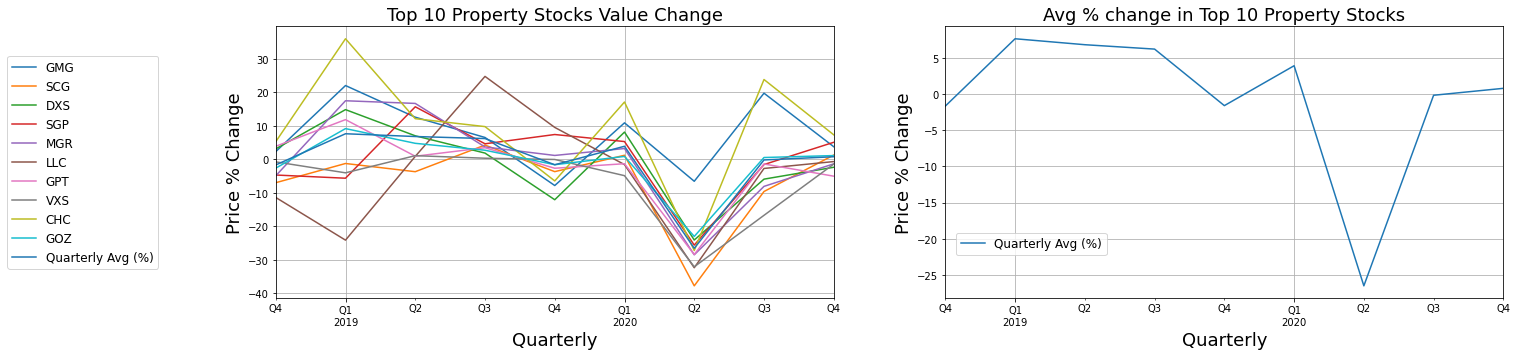

In [12]:
# Create a Figure that will hold 2 line charts side to side. 
# On the left side we will plot all 10 shares plus their mean
# On the right side only the average movement (mean), so later we can compare that data with
# other macro variables in and out of the share market

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize =(22,5))


# Create variables that identify the coordinates of the data we wish to plot
top10_linechart_df = price_change.iloc[:, 0:11] 
avg_linechart_df = price_change.iloc[:, 10:11]

# Plot and label our right side graph
top10_linechart_df.plot(ax=ax1, grid = True)
ax1.set_xlabel('Quarterly', fontsize=18)
ax1.set_ylabel('Price % Change', fontsize=18)
ax1.set_title('Top 10 Property Stocks Value Change', fontsize=18)
# Define the Ideal Location for our legend
ax1.legend(loc=5, fontsize = 12,bbox_to_anchor=(-.2,.5))
# Plot a Grid in each graph
plt.grid()

# Plot and label our left side graph
avg_linechart_df.plot(ax=ax2)
ax2.set_xlabel('Quarterly', fontsize=18)
ax2.set_ylabel('Price % Change', fontsize=18)
ax2.set_title('Avg % change in Top 10 Property Stocks', fontsize=18)
ax2.legend(loc=5, fontsize = 12,bbox_to_anchor=(.3,.2))

plt.grid()
# Save our Figure in PNG format
plt.savefig('top 10.png', bbox_inches='tight')

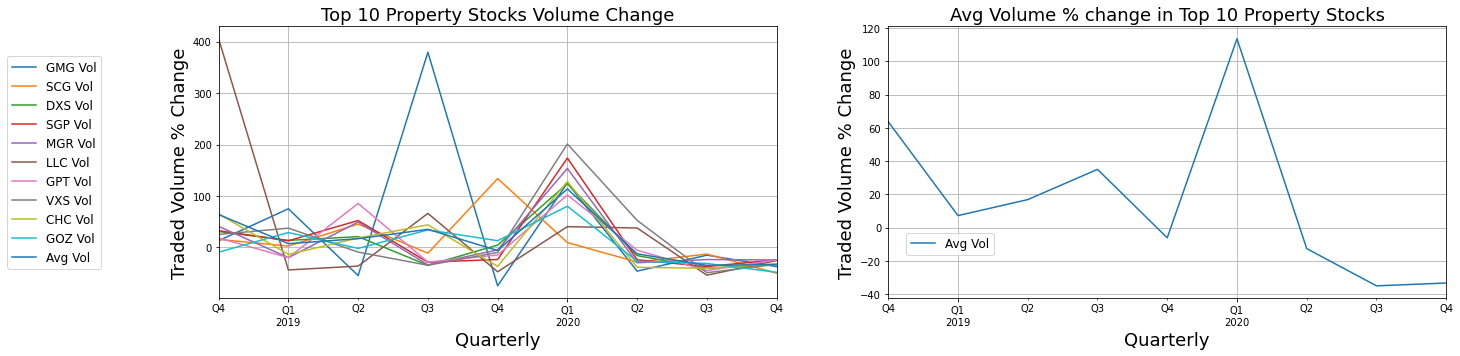

In [117]:
# Repeat the same proccess for our Volume Traded Data
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize =(22,5))


top10vol_linechart_df = vol_change.iloc[:, 0:11] 
avgvol_linechart_df = vol_change.iloc[:, 10:11]

top10vol_linechart_df.plot(ax=ax1, grid=True)
ax1.set_xlabel('Quarterly', fontsize=18)
ax1.set_ylabel('Traded Volume % Change', fontsize=18)
ax1.set_title('Top 10 Property Stocks Volume Change', fontsize=18)
ax1.legend(loc=5, fontsize = 12,bbox_to_anchor=(-.2,.5))
plt.grid()


avgvol_linechart_df.plot(ax=ax2)
ax2.set_xlabel('Quarterly', fontsize=18)
ax2.set_ylabel('Traded Volume % Change', fontsize=18)
ax2.set_title('Avg Volume % change in Top 10 Property Stocks', fontsize=18)
ax2.legend(loc=5, fontsize = 12,bbox_to_anchor=(.2,.2))
plt.grid()

plt.savefig('top 10 vol.png', bbox_inches='tight')

In [22]:
# Save our tables in CSV Files, monthly data will be used on the following analysis
# We need the amount of data points contained in monthly data to possible run a linear Regression
print('DataFrame:\n', price_change) 
price_change_csv = price_change.to_csv('price_change.csv', index = False) 
print('\nCSV String:\n', price_change_csv) 

print('DataFrame:\n', vol_change) 
vol_change_csv = vol_change.to_csv('vol_change.csv', index = False) 
print('\nCSV String:\n', vol_change_csv)

print('DataFrame:\n', m_change) 
m_change_csv = m_change.to_csv('m_change.csv', index = False) 
print('\nCSV String:\n', m_change_csv)

DataFrame:
            GMG     SCG     DXS     SGP     MGR     LLC     GPT     VXS  \
Quarter                                                                  
2018Q4   2.33%  -6.94%   3.16%  -4.64%  -4.88% -11.34%   3.93%  -0.72%   
2019Q1  22.06%  -1.20%  14.88%  -5.60%  17.52% -24.08%  11.89%  -3.99%   
2019Q2  12.62%  -3.65%   7.06%  15.72%  16.73%   0.92%   0.97%   1.13%   
2019Q3   6.56%   4.29%   1.91%   4.68%   3.74%  24.79%   3.51%   0.37%   
2019Q4  -7.78%  -3.63% -12.01%   7.45%   1.20%   9.57%  -2.62%   0.00%   
2020Q1  10.93%   1.26%   8.18%   5.35%   3.26%  -1.53%  -1.27%  -4.83%   
2020Q2  -6.51% -37.72% -24.04% -25.56% -28.45% -32.31% -28.37% -32.03%   
2020Q3  19.78%  -9.56%  -5.87%  -1.52%  -8.03%  -2.68%  -1.34% -16.67%   
2020Q4   3.80%   1.32%  -2.33%   5.13%  -1.31%  -0.63%  -4.99%  -1.38%   

            CHC     GOZ  Quarterly Avg (%)  
Quarter                                     
2018Q4    5.30%  -2.59%             -1.64%  
2019Q1   36.03%   9.21%              7

In [37]:
# Import extra modules to Create a Scatter Plot between Change in Share Value and Change in 
# National Property Sales

import csv
import scipy.stats as stats

In [83]:
# Access our monthly national sales data and format it
sales = "national_sales_by_month.csv"


sales_reader = pd.read_csv(sales)
sales_reader

sales_df = pd.DataFrame(sales_reader)
sales_change = (sales_df['Sales'].pct_change(1) * 100)
sales_change_df = pd.DataFrame(sales_change)

sales_df = sales_df.rename(columns = {"Sales":"N_Sales"}) 

sales_frame = [sales_df, sales_change]


dated_sales = pd.concat(sales_frame, axis=1, sort=False)

dated_sales.drop(sales_df.head(1).index,inplace=True)
dated_sales = dated_sales.drop(columns=['N_Sales'],axis = 1)
dated_sales

,Year,Month,Sales
1,2018,11,1.58%
2,2018,12,-19.42%
3,2019,1,-27.19%
4,2019,2,40.16%
5,2019,3,20.53%
6,2019,4,-10.62%
7,2019,5,11.05%
8,2019,6,-4.94%
9,2019,7,4.80%
10,2019,8,5.47%


In [28]:
stock = "m_change.csv"
stock_reader = pd.read_csv(stock)

stocks_df = pd.DataFrame(stock_reader)
stocks_df.drop(stocks_df.tail(2).index,inplace=True)
stocks_df.drop(stocks_df.head(1).index,inplace=True)

stocks_df = stocks_df[['Monthly Avg (%)']]
stocks_df

,Monthly Avg (%)
1,-1.23%
2,0.72%
3,2.06%
4,6.66%
5,2.20%
6,0.73%
7,3.92%
8,1.74%
9,4.50%
10,1.19%


In [85]:
frames = [dated_sales, stocks_df]
result = pd.concat(frames, axis=1, sort=False)
pd.options.display.float_format = '{:.2f}%'.format
result = result.drop(result.index[[-2,-1]])

result = result[['Year','Month','Sales','Monthly Avg (%)']]

result


,Year,Month,Sales,Monthly Avg (%)
1,2018,11,1.58%,-1.23%
2,2018,12,-19.42%,0.72%
3,2019,1,-27.19%,2.06%
4,2019,2,40.16%,6.66%
5,2019,3,20.53%,2.20%
6,2019,4,-10.62%,0.73%
7,2019,5,11.05%,3.92%
8,2019,6,-4.94%,1.74%
9,2019,7,4.80%,4.50%
10,2019,8,5.47%,1.19%


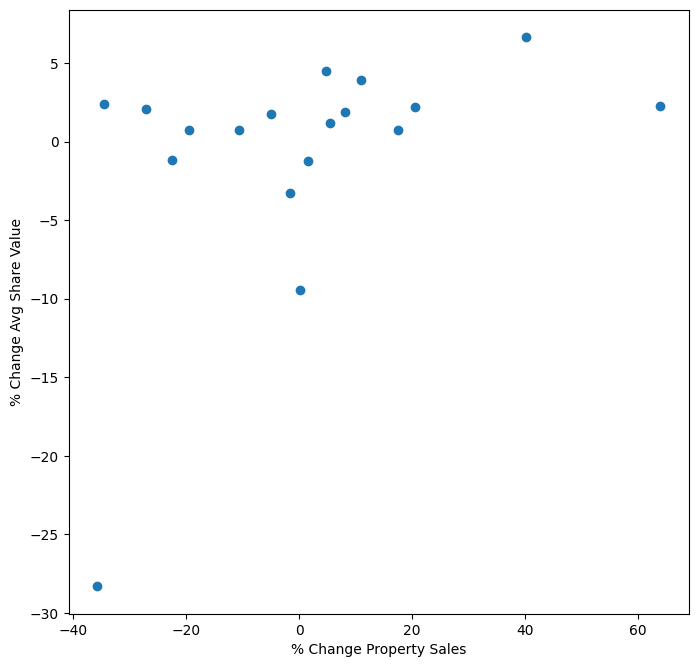

In [115]:
# set X and Y variables for our scatter plot
x_values = result['Sales']
y_values = result['Monthly Avg (%)']

# Place the variables in our scatter plot and label them
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(x_values,y_values)
plt.xlabel('% Change Property Sales')
plt.ylabel('% Change Avg Share Value')
#Save our Scatter plot
plt.savefig('Scatter.png', dpi=100, bbox_inches='tight')
plt.show()

# Our Scatter Plot Shows that Share price value variation presented some stability when compared 
# with the variation in Property Sales.
# We can notice a clear exception when both variables revealed a record drop. 
# As we've seen previously this drop relates to the beginning of Q2 2020


In [116]:
# Before further exploring this data we must find out if our samples fir in a normal distribution.
# The following test returns a pvalue = 0.1888 for Change in Sales and pvalue = 6.7756 for 
# change in Share Value
# Both largely exceet a 0.05 alpha, therefor we must consider the null hypothesis and 
# cannot run a linear Regression

print(stats.normaltest(x_values))
print(stats.normaltest(y_values))

NormaltestResult(statistic=3.3334267912709192, pvalue=0.18886677708162192)
NormaltestResult(statistic=33.01469399475924, pvalue=6.775639453367553e-08)


C:\ProgramData\Anaconda3\envs\class_31\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
